# Self-Organizing Map (SOM) for Face Image Clustering
In this notebook, we will explore how to use a Self-Organizing Map (SOM) to cluster face images. The code provided performs the following tasks:

# 1. Import Necessary Libraries

In [1]:
# We start by importing the required Python libraries for this project: numpy for numerical operations, fetch_olivetti_faces from sklearn.
# datasets to load face image data, MinMaxScaler for data normalization, and matplotlib for visualization.

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 2. Load Face Image Data

In [3]:
# Here, the fetch_olivetti_faces dataset is loaded using scikit-learn's fetch_olivetti_faces() function, and data in faces.

data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = data.data
# Shuffle data
np.random.shuffle(faces)

# 3. show some imgae of dataset

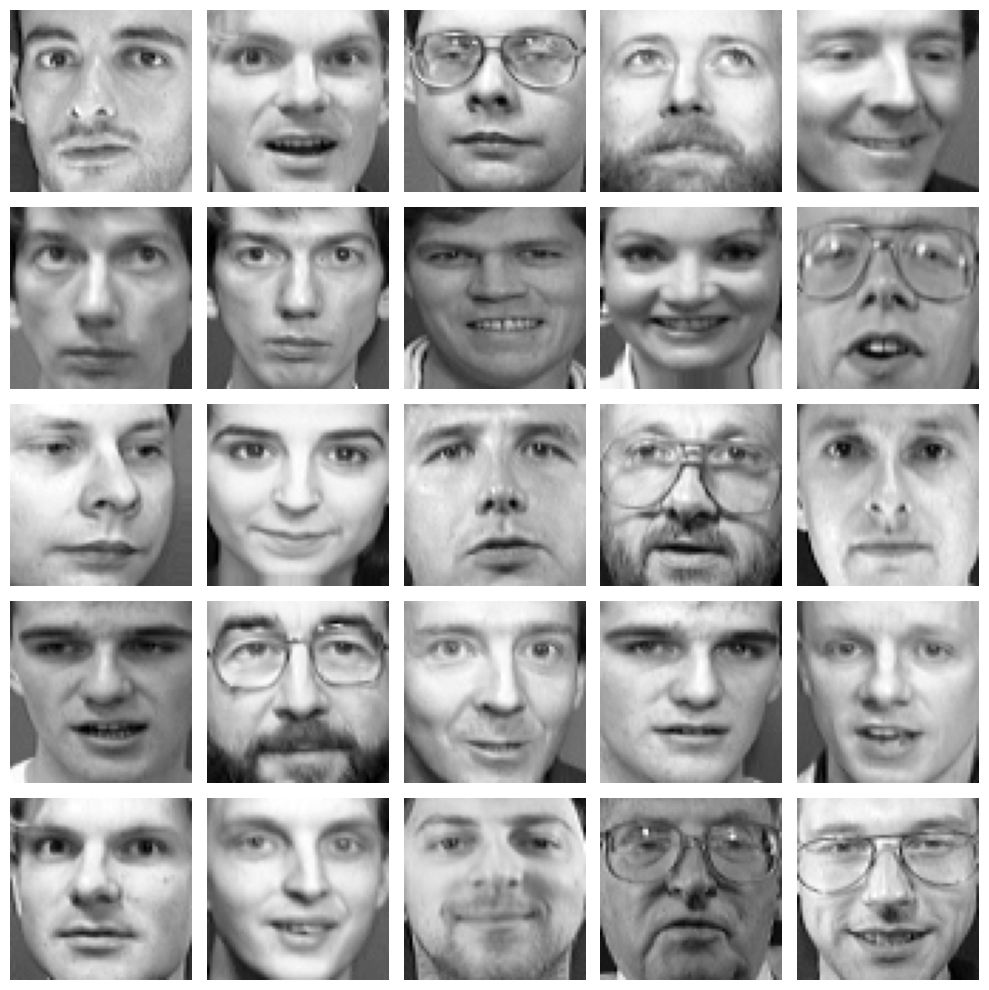

In [4]:
# In this block, show 25 image from dataset
num_images_to_show = 25
# Display the selected images in a 5x5 grid
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
for i in range(num_images_to_show):
    plt.subplot(5, 5, i + 1)
    plt.imshow(faces[i].reshape(64, 64), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 4. Normalize the Data

In [5]:
# The face image data is then normalized to the range [0, 1] using MinMaxScaler to ensure that all features have the same scale.

scaler = MinMaxScaler()
faces_normalized = scaler.fit_transform(faces)

# 5. Define SOM Parameters and Initialize the SOM

In [6]:
# The parameters of the self-organizing map (SOM) are determined, and initialize the SOM

epochs = 500
num_neurons = 100  # Number of neurons in the SOM
learning_rate = 0.1
input_dim = faces_normalized.shape[1]  # Input dimension (number of features)

# Initialize SOM weights
weights = np.random.random(size=(num_neurons, input_dim))

# 6. Finding the Best Matching Unit

In [7]:
def find_best_matching_unit(weights, x):
    # Calculate the Euclidean distances between the `weights` and `x`
    distances = np.linalg.norm(weights - x, axis=1)

    # Find the index of the minimum distance
    bmu_index = np.argmin(distances)

    # Convert the flattened index to grid coordinates
    bmu_coordinates = np.unravel_index(bmu_index, (num_neurons, 1))

    return bmu_coordinates

# Example of how to use the function
# Assume 'sample_input' is the input data for which you want to find the BMU
sample_input = faces_normalized[0]  # You can replace this with any input from your dataset
bmu_coords = find_best_matching_unit(weights, sample_input)
print("BMU Coordinates:", bmu_coords)

BMU Coordinates: (30, 0)


# 7. Train the SOM

In [ ]:
# Set batch size for batch processing
batch_size = 64

for epoch in range(epochs):
    # Shuffle the dataset for each epoch
    np.random.shuffle(faces_normalized)

    for start_index in range(0, len(faces_normalized), batch_size):
        batch = faces_normalized[start_index:start_index + batch_size]

        # Find the best matching unit (BMU) for the entire batch
        bmu_indices_batch = np.apply_along_axis(lambda x: find_best_matching_unit(weights, x), 1, batch)

        # Update weights for the neighborhood of the BMU using vectorized operations
        distances_to_bmu = np.abs(np.arange(num_neurons) - bmu_indices_batch[:, np.newaxis])
        neighborhood_function = np.exp(-(distances_to_bmu**2) / (2 * (5**2)))

        # Reshape the neighborhood_function to (num_neurons, 1) for broadcasting
        neighborhood_function = neighborhood_function[:, np.newaxis, :]

        # Calculate weight updates for the entire batch
        weight_updates = learning_rate * neighborhood_function * (batch[:, np.newaxis, :] - weights)

        # Sum the weight updates along the batch axis and apply them to the weights
        weights += np.sum(weight_updates, axis=0) / batch_size

    # Decay the learning rate for each epoch
    learning_rate = learning_rate * (1 - epoch/epochs)


# 8. Visualize

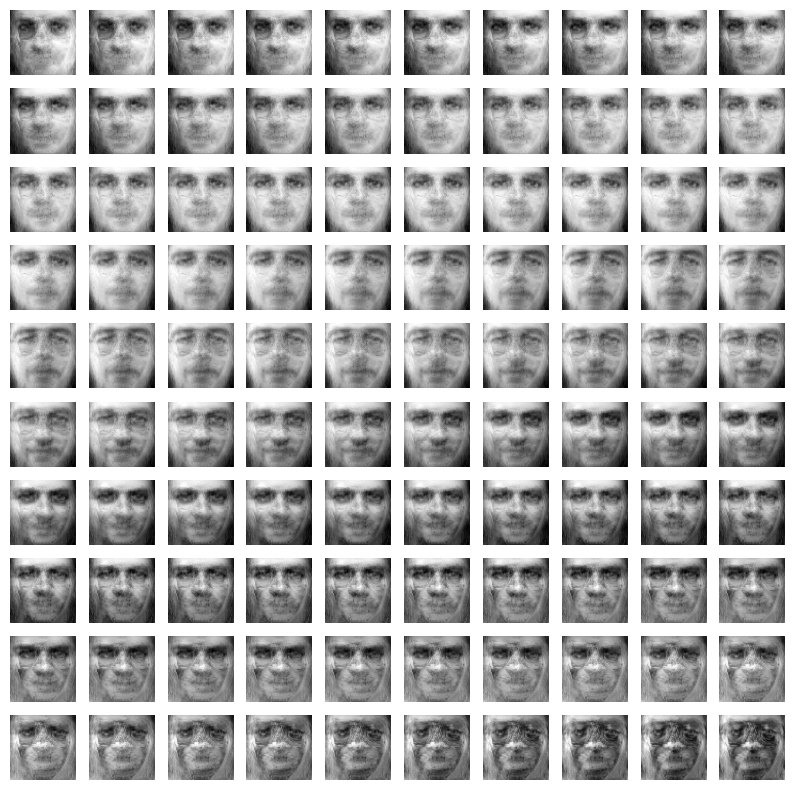

In [16]:
# Finally, the code visualizes the learned SOM. It creates a 5x5 grid of subplots and displays the SOM neurons as images.

plt.figure(figsize=(10, 10))
for i, face in enumerate(weights):
    plt.subplot(10, 10, i + 1)
    plt.imshow(face.reshape(64, 64), cmap='gray')
    plt.axis('off')

plt.show()